# Data Processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasetRetail = pd.read_excel('Online_retail.xlsx')

# Group the dataset by CustomerID
customers_grouped = datasetRetail.groupby('CustomerID')

# Creates an empty dictionary to store the items bought by each customer
# ID : Description, Quantity
customer_items = {} 

# Iterates through each customer
for customer_id, group_data in customers_grouped:

    # Checks if customer_id is already in dictionary
    if not (customer_id in customer_items.keys()):
        customer_items[customer_id] = []

    # For each costumer_id, it adds the product to that costumer
    for i in range(len(group_data["Country"].values)):
        dataset_values = {
                          "Description": group_data["Description"].values[i],
                          "Quantity": group_data["Quantity"].values[i]
                          }

        if(group_data["Quantity"].values[i] > 0):
            customer_items[customer_id].append(dataset_values)

In [2]:
#----------------- Accounting total registrations, null CustomerID and Products reimbursed -----------------#

# Accouting total registrations
total_registrations = len(datasetRetail)
print(f'Total registrations: {total_registrations}')

# Checks if CustomerID is null and counts it if true
category_counts_nullIDs = (datasetRetail['CustomerID'].isna()).sum()
print(f'Number of Customers with ID null: {category_counts_nullIDs}') #135080 null CustomerID's


category_counts_products_reimbursed = (datasetRetail['Quantity'] <= 0).sum()
print(f'Number of products reimbursed: {category_counts_products_reimbursed}') #10624 products reimbursed

#---------------- Rate Products reimbursed ----------------#

reimbursement_rate = (category_counts_products_reimbursed / len(datasetRetail['InvoiceNo'])) * 100
print(f'Rate of products reimbursed: {reimbursement_rate}') #1.9604767590130447

#---------------- Rate Purchases with no CustomerID ----------------#

noClientID_rate = (category_counts_nullIDs / len(datasetRetail['CustomerID'])) * 100
print(f'Rate of purchased with no CustomerID: {noClientID_rate}') #24.926694334288598

Total registrations: 541909
Number of Customers with ID null: 135080
Number of products reimbursed: 10624
Rate of products reimbursed: 1.9604767590130447
Rate of purchased with no CustomerID: 24.926694334288598


# Data Cleaning

In [2]:
#----------------- Filtering the Dataset -----------------#

# Filter the Dataset where 'Quantity' needs to be greater than 0 (531285) and CustomerID not null (406829). 
filtered_data_quantity = datasetRetail[(datasetRetail['Quantity'] > 0) & (~datasetRetail['CustomerID'].isna())] #397924

# It also filters the Dataset where 'StockCode' can't be BANK CHARGES and POST. These refer to expenses and not products.
filtered_data_stockcode = filtered_data_quantity[~((filtered_data_quantity['StockCode'] == "BANK CHARGES") | (filtered_data_quantity['StockCode'] == "POST"))]
    
print(f'Final number of rows based on the filtration made: {len(filtered_data_stockcode)}') #396813

Final number of rows based on the filtration made: 396813


# Data Overview

In [4]:
#----------------- Distinct Product Count  -----------------#

# Check if any rows satisfy the condition
if not filtered_data_stockcode.empty:
    category_counts_stockcode = filtered_data_stockcode['StockCode'].value_counts()
    print(f'Number of different products: {len(category_counts_stockcode)}') #3665

Number of different products: 3663


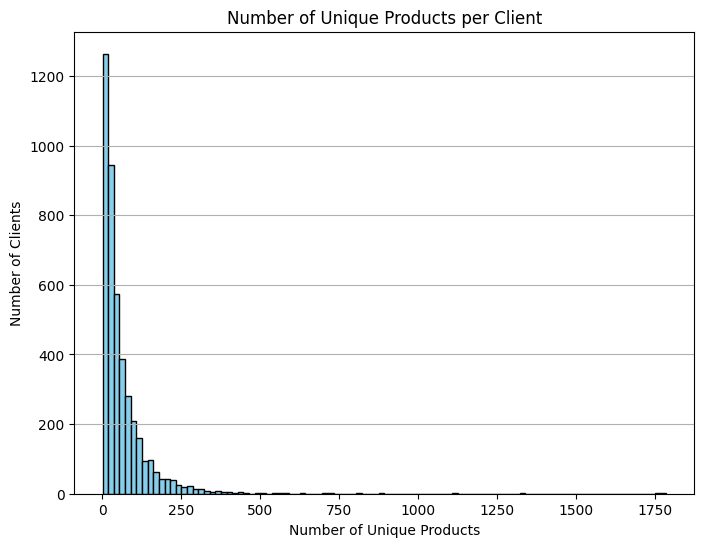

Q1 Quantile: 16.0
Q2 Quantile: 35.0
Q3 Quantile: 77.0


In [3]:
unique_products_per_client = filtered_data_stockcode.groupby('CustomerID')['StockCode'].nunique()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(unique_products_per_client, bins=100, color='skyblue', edgecolor='black')
plt.title('Number of Unique Products per Client')
plt.xlabel('Number of Unique Products')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(unique_products_per_client, .25)}')
print(f'Q2 Quantile: {np.quantile(unique_products_per_client, .50)}')
print(f'Q3 Quantile: {np.quantile(unique_products_per_client, .75)}')

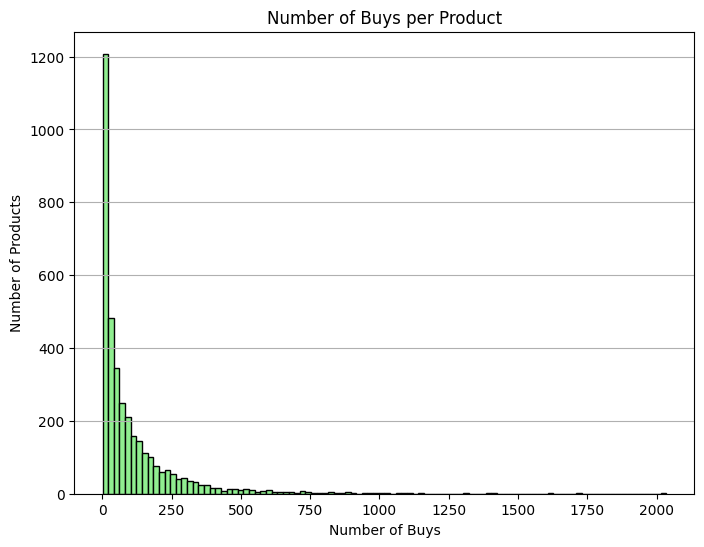

Q1 Quantile: 12.0
Q2 Quantile: 49.0
Q3 Quantile: 135.0


In [4]:
# Count the number of purchases for each product
buys_per_product = filtered_data_stockcode['StockCode'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(buys_per_product, bins=100, color='lightgreen', edgecolor='black')
plt.title('Number of Buys per Product')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(buys_per_product, .25)}')
print(f'Q2 Quantile: {np.quantile(buys_per_product, .50)}')
print(f'Q3 Quantile: {np.quantile(buys_per_product, .75)}')

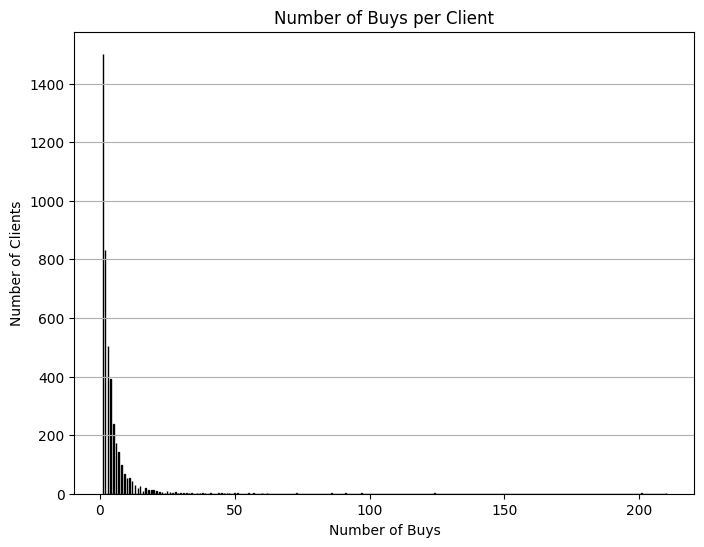

Q1 Quantile: 1.0
Q2 Quantile: 2.0
Q3 Quantile: 5.0


In [5]:
# Group by CustomerID and count the number of products for each customer
buys_per_client = filtered_data_stockcode.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(buys_per_client, bins=1000, color='skyblue', edgecolor='black')
plt.title('Number of Buys per Client')
plt.xlabel('Number of Buys')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(buys_per_client, .25)}')
print(f'Q2 Quantile: {np.quantile(buys_per_client, .50)}')
print(f'Q3 Quantile: {np.quantile(buys_per_client, .75)}')

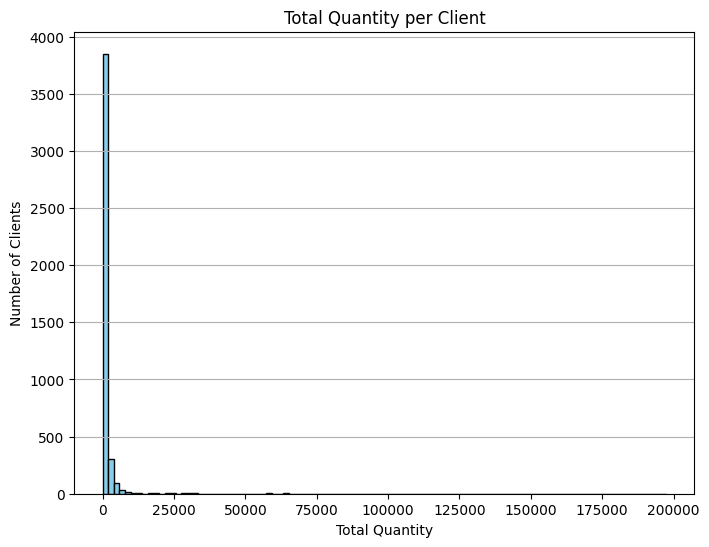

Q1 Quantile: 160.0
Q2 Quantile: 379.0
Q3 Quantile: 992.75


In [6]:
# Calculate the total quantity per client
quantity_per_client = filtered_data_stockcode.groupby('CustomerID')['Quantity'].sum()

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(quantity_per_client, bins=100, color='skyblue', edgecolor='black')
plt.title('Total Quantity per Client')
plt.xlabel('Total Quantity')
plt.ylabel('Number of Clients')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(quantity_per_client, .25)}')
print(f'Q2 Quantile: {np.quantile(quantity_per_client, .50)}')
print(f'Q3 Quantile: {np.quantile(quantity_per_client, .75)}')

In [9]:
#----------------- Distinct Countries -----------------#

# Counts the different countries through the dataset
category_counts_country = filtered_data_stockcode['Country'].value_counts()
print(f'Number of different countries: {len(category_counts_country)}') #37

Number of different countries: 37


In [10]:
#----------------- Distinct Client Count -----------------#

# Counts the different clients through the dataset
category_counts_customerID = filtered_data_stockcode['CustomerID'].value_counts()
print(f'Number of different clients: {len(category_counts_customerID)}') #4339

Number of different clients: 4338


In [11]:
#----------------- Distinct Purchases Done -----------------#

category_counts_invoiceNo = filtered_data_stockcode['InvoiceNo'].value_counts()
print(f'Number of different purchases done: {len(category_counts_invoiceNo)}')
#Purchases reimbursed: 5172

Number of different purchases done: 18473


In [12]:
#---------------- Scatter Plot Purchases ----------------#

#TODO - Find another way to scatterplot; Still testing

# Example of a count plot for StockCode
#sns.countplot(x="StockCode", data=filtered_data_quantity)
#plt.show()

# Example of a count plot for CustomerID
#sns.countplot(x="CustomerID", data=filtered_data_quantity)
#plt.show()

# Example of a count plot for InvoiceNo
#sns.countplot(x="InvoiceNo", data=filtered_data_quantity)
#plt.show()


#purchases_variables = filtered_data_quantity[["StockCode", "CustomerID", "InvoiceNo", "InvoiceDate"]]
#pd.plotting.scatter_matrix(purchases_variables)

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


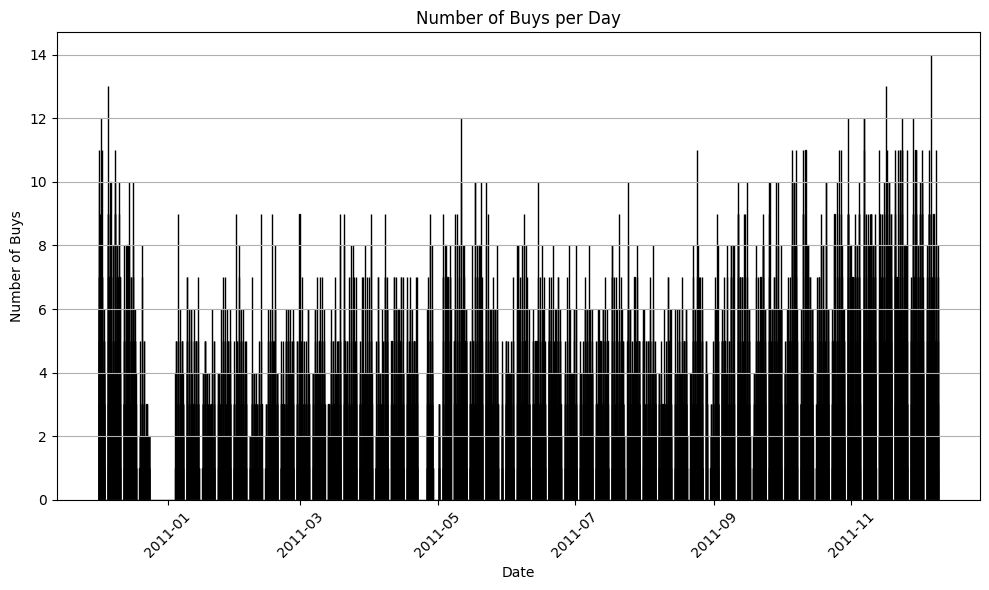

In [13]:
filtered_data_stockcode['InvoiceDate'] = pd.to_datetime(filtered_data_stockcode['InvoiceDate']) #.dt.date

#Group by PurchaseDate and count the number of buys for each day
buys_per_day = filtered_data_stockcode['InvoiceDate'].value_counts() # Remove sort_index()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buys_per_day.index, bins=len(buys_per_day), color='skyblue', edgecolor='black')
plt.title('Number of Buys per Day')
plt.xlabel('Date')
plt.ylabel('Number of Buys')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


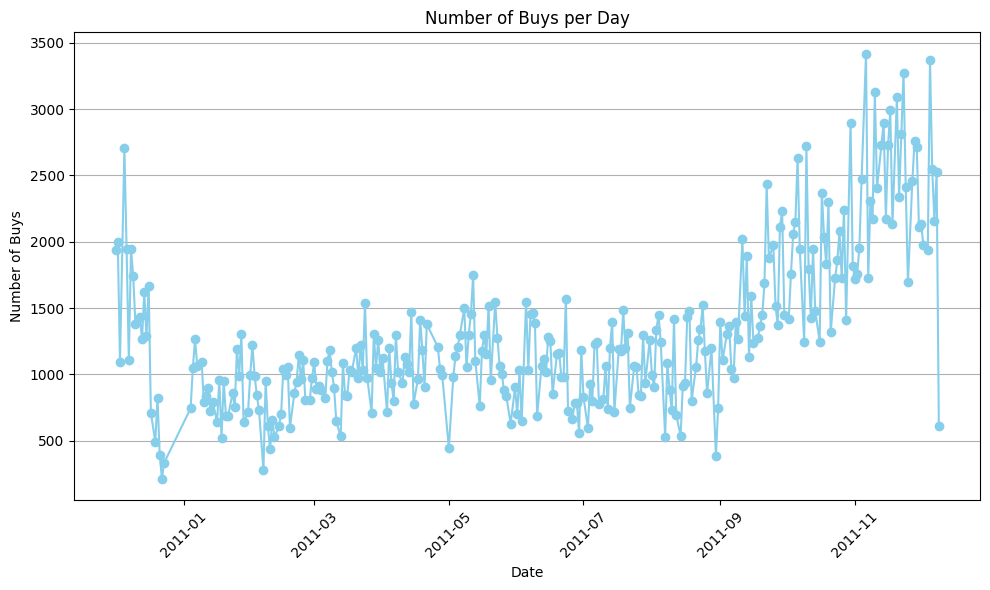

In [14]:
# Number of different buys per day

filtered_data_stockcode['InvoiceDate'] = pd.to_datetime(filtered_data_stockcode['InvoiceDate']).dt.date

# Group by PurchaseDate and count the number of buys for each day
buys_each_day = filtered_data_stockcode.groupby('InvoiceDate').size()

# Create a line plot (assuming you want a line plot for dates)
plt.figure(figsize=(10, 6))
buys_each_day.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Number of Buys per Day')
plt.xlabel('Date')
plt.ylabel('Number of Buys')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


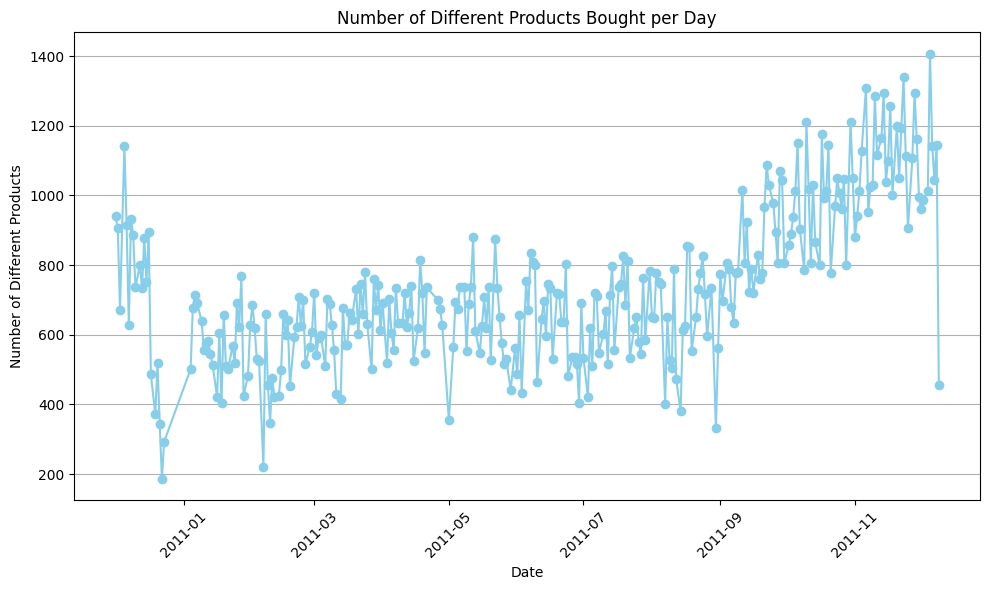

In [15]:
# Number of different products that are bought per day

filtered_data_stockcode['InvoiceDate'] = pd.to_datetime(filtered_data_stockcode['InvoiceDate']).dt.date

# Group by PurchaseDate and count the number of unique products for each day
products_per_day = filtered_data_stockcode.groupby(['InvoiceDate', 'StockCode'])['InvoiceNo'].nunique().groupby('InvoiceDate').size()

# Create a line plot (assuming you want a line plot for dates)
plt.figure(figsize=(10, 6))
products_per_day.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Number of Different Products Bought per Day')
plt.xlabel('Date')
plt.ylabel('Number of Different Products')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


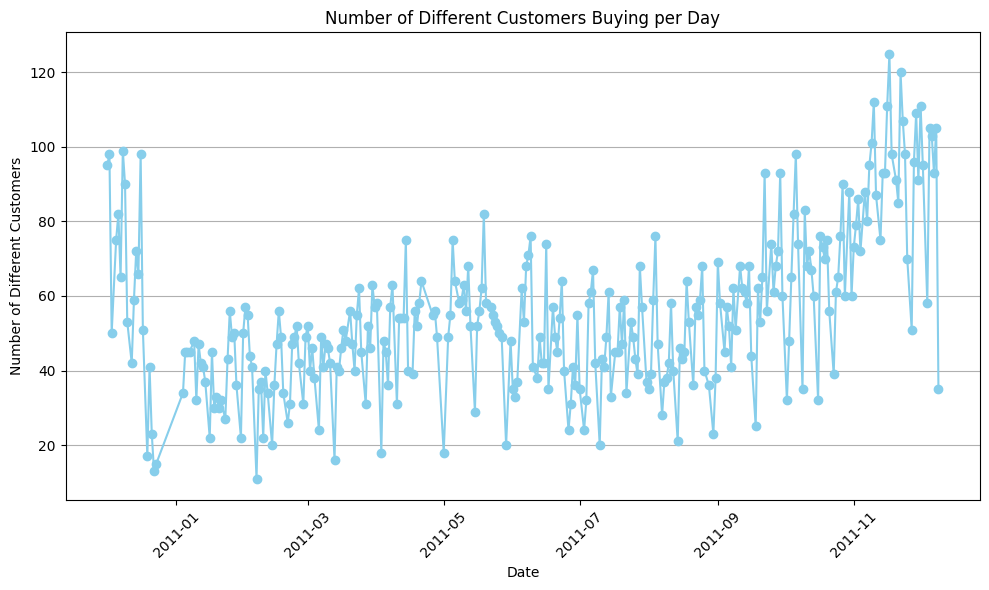

In [16]:
# Number of different customers that made buys in that day

filtered_data_stockcode['InvoiceDate'] = pd.to_datetime(filtered_data_stockcode['InvoiceDate']).dt.date

# Group by PurchaseDate and count the number of unique customers for each day
customers_per_day = filtered_data_stockcode.groupby(['InvoiceDate', 'CustomerID'])['InvoiceNo'].nunique().groupby('InvoiceDate').size()

# Create a line plot (assuming you want a line plot for dates)
plt.figure(figsize=(10, 6))
customers_per_day.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Number of Different Customers Buying per Day')
plt.xlabel('Date')
plt.ylabel('Number of Different Customers')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


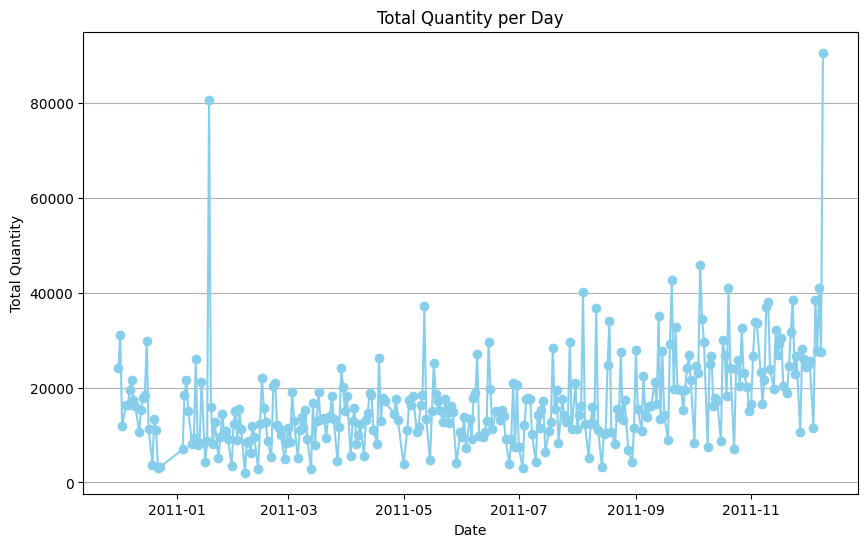

Q1 Quantile: 10828.0
Q2 Quantile: 15132.0
Q3 Quantile: 20925.0


In [17]:
# Convert 'InvoiceDate' to datetime format
filtered_data_stockcode['InvoiceDate'] = pd.to_datetime(filtered_data_stockcode['InvoiceDate'])

# Calculate the total quantity per day
quantity_per_day = filtered_data_stockcode.groupby(filtered_data_stockcode['InvoiceDate'].dt.date)['Quantity'].sum()

# Create a histogram
plt.figure(figsize=(10, 6))
quantity_per_day.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Total Quantity per Day')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.grid(axis='y')
plt.show()

# Calculate quantis (25%,50%,75%)
print(f'Q1 Quantile: {np.quantile(quantity_per_day, .25)}')
print(f'Q2 Quantile: {np.quantile(quantity_per_day, .50)}')
print(f'Q3 Quantile: {np.quantile(quantity_per_day, .75)}')

# Data Sampling

In [18]:
#----------------- Customer Distinction  -----------------#

#TODO - Modify this

# Through the dataset, we check what type of clients we have.
# In a year, if a client made below 100 purchases, we consider as a normal client
# In a year, if a client made between 100 and 364 purchases, we consider as a daily client
# In a year, if a client made between 365 and 7962 purchases, we consider as big client
normal_clients = 0
daily_clients = 0
big_clients = 0

for client_id, purchases in customer_items.items():
    if len(purchases) < 100:
        normal_clients += 1
    elif 100 <= len(purchases) < 365:
        daily_clients += 1
    elif 365 <= len(purchases) < 7963:
        big_clients += 1
    else:
        print(f"Error for ClientID {client_id}: Unexpected number of purchases - {len(purchases)}")

print(normal_clients)
print(daily_clients)
print(big_clients)

3281
929
162


In [7]:
# More filtrations in order to make better network representations in Gephi

# In the dataset we want to eliminate products that have been bought only once
filtered_data_bought_once = filtered_data_stockcode[filtered_data_stockcode['StockCode'].isin(buys_per_product[buys_per_product > 1].index)]

print(len(filtered_data_bought_once))

# In the dataset we want to eliminate clients that bought only one product
filtered_data_clients = filtered_data_bought_once[filtered_data_bought_once['CustomerID'].isin(unique_products_per_client[unique_products_per_client > 1].index)]

print(len(filtered_data_clients))

# Filter CustomerIDs based on the 50th percentile
filtered_data_quantile_customer = filtered_data_clients[filtered_data_clients['CustomerID'].isin(buys_per_client[buys_per_client <= np.quantile(buys_per_client, .50)].index)]

print(len(filtered_data_quantile_customer))

# Filter CustomersIDs based on the 50th percentile
filtered_data_quantile_quantity = filtered_data_quantile_customer[filtered_data_quantile_customer['CustomerID'].isin(quantity_per_client[quantity_per_client <= np.quantile(quantity_per_client, .50)].index)] #Re-do

print(len(filtered_data_quantile_quantity))

396646
396516
69164
42490


# Network Creation

In [20]:
#----------------- Client-Product Relation -----------------#

customer_data = []

for id in customer_items.keys():
    for customer_item in customer_items.get(id):
        array_values = {
            "CustomerID" : id,
            "Description" : customer_item["Description"],
            "Quantity" : customer_item["Quantity"]
        }
        customer_data.append(array_values)

output_dataframe = pd.DataFrame(customer_data)
output_dataframe

,CustomerID,Description,Quantity
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,74215
1,12347.0,BLACK CANDELABRA T-LIGHT HOLDER,12
2,12347.0,AIRLINE BAG VINTAGE JET SET BROWN,4
3,12347.0,COLOUR GLASS. STAR T-LIGHT HOLDER,12
4,12347.0,MINI PAINT SET VINTAGE,36
...,...,...,...
397919,18287.0,LIPSTICK PEN RED,12
397920,18287.0,HAND WARMER SCOTTY DOG DESIGN,12
397921,18287.0,SET OF 3 WOODEN SLEIGH DECORATIONS,36
397922,18287.0,PAINTED METAL STAR WITH HOLLY BELLS,48


In [8]:
#----------------- Product-Product Relation -----------------#

# Agroup the data by customerID, StockCode and their quantity
output_agg = filtered_data_quantile_quantity.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'})

# Creates the correct index
output_agg.reset_index(inplace=True)

# Merge the dataframe to create the relation needed
output_agg = pd.merge(output_agg, output_agg, how='inner', on='CustomerID')

# Filters the output, where it only gives the products that are different
result_df = output_agg[output_agg['StockCode_x'] != output_agg['StockCode_y']]

# Get the dataframe with only the products
result_df = result_df[['StockCode_x', 'StockCode_y']]


#----------------- New code sent to GitHub -----------------#

# Calculate the total purchases for each product
total_purchases_per_product = filtered_data_quantile_quantity.groupby('StockCode')['Quantity'].sum()

# Group by the product-product pairs and count the occurrences
result_df_pp = result_df.groupby(['StockCode_x', 'StockCode_y']).size().reset_index(name='Count')

# Filter out pairs where the count is greater than 40% of the total purchases of the primary product
result_df_pp_filtered = result_df_pp[(result_df_pp['Count'] <= 0.4 * result_df_pp['StockCode_x'].map(total_purchases_per_product)) & (result_df_pp['Count'] != 1)]

# Merge result_df with result_df_pp_filtered on both StockCode_x and StockCode_y
filtered_result_df_pp = pd.merge(result_df, result_df_pp_filtered, left_on=['StockCode_x', 'StockCode_y'], right_on=['StockCode_x', 'StockCode_y'], how='inner')

# Display the final DataFrame
print(filtered_result_df_pp)

       StockCode_x StockCode_y  Count
0            20615       20652      3
1            20615       20652      3
2            20615       20652      3
3            20615       21832      2
4            20615       21832      2
...            ...         ...    ...
711891       47566       23414      2
711892       20914       23404      2
711893       20914       23404      2
711894       23404       20914      2
711895       23404       20914      2

[711896 rows x 3 columns]


In [9]:
#----------------- Client-Client Relation -----------------#

# Agroup the data by customerID, StockCode and their quantity
output_agg_cc = filtered_data_quantile_quantity.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'})

# Creates the correct index
output_agg_cc.reset_index(inplace=True)

# Merge the dataframe to create the relation needed
output_agg_cc = pd.merge(output_agg_cc, output_agg_cc, how='inner', on='StockCode')

# Filters the output, where it only gives the clients that are different
result_df_cc = output_agg_cc[output_agg_cc['CustomerID_x'] != output_agg_cc['CustomerID_y']]

# Get the dataframe with only the products
result_df_cc = result_df_cc[['CustomerID_x', 'CustomerID_y']]

#----------------- New code sent to GitHub -----------------#

# Count the number of unique products purchased by each customer
unique_products_per_customer = filtered_data_quantile_quantity.groupby('CustomerID')['Quantity'].nunique()

# Filter out customers with purchases for just one product
filtered_customers = unique_products_per_customer[unique_products_per_customer > 1].index

# Filter the output dataframe to include only the filtered customers
filtered_result_df_cc = result_df_cc[result_df_cc['CustomerID_x'].isin(filtered_customers) & result_df_cc['CustomerID_y'].isin(filtered_customers)]

# Display the filtered dataframe
print(filtered_result_df_cc)

         CustomerID_x  CustomerID_y
1             12350.0       12538.0
2             12350.0       13544.0
3             12350.0       15006.0
4             12538.0       12350.0
6             12538.0       13544.0
...               ...           ...
1355153       18024.0       18101.0
1355154       18101.0       17999.0
1355155       18101.0       18024.0
1355170       18101.0       18110.0
1355171       18110.0       18101.0

[1304510 rows x 2 columns]


In [10]:
#----------------- Export Results -----------------#

#file_path_cp = 'Client-Product.csv'

#output_dataframe.to_csv(file_path_cp, index=False)

file_path_pp = 'Product-Product.csv'

filtered_result_df_pp.to_csv(file_path_pp, index=False)

file_path_cc = 'Client-Client.csv'

filtered_result_df_cc.to_csv(file_path_cc, index=False)